In [1]:
import os
from PIL import Image

import sys
import importlib

def call_module(nm, path):
    spec = importlib.util.spec_from_file_location(nm, path)
    foo = importlib.util.module_from_spec(spec)
    sys.modules[nm] = foo
    spec.loader.exec_module(foo)
    return foo

In [34]:
class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("RGB", (self.n_h*self.r, self.n_v*self.r))
        self.cursor = [0,0]    
    
    def move_cursor_h(self):
        self.cursor[0] += self.r
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path):
        try:
            self.img.paste(Image.open(path).convert('RGB'), tuple(self.cursor))
        except:
            print(f"Not Appended: {path}")
        
    def save_img(self, path):
        self.img.save(path)

In [2]:
fd = "/home/jupyter/ai_font/experiments/sample"

args = call_module('args', f"{fd}/args.py")
SampleArgs = args.SampleArgs

sample = call_module('sample', f"{fd}/sample.py")
load_fontdiffuser_pipeline = sample.load_fontdiffuser_pipeline
sampling = sample.sampling

In [3]:
args = SampleArgs()
model_type = 'funit_fontdiffuser_training_phase_1'
model_i = '160000'
modelpaths = {
    'unet': f"{args.model_fd}/{model_type}__unet_{model_i}.pth",
    'content_encoder': f"{args.model_fd}/{model_type}__content_encoder_{model_i}.pth",
    'style_encoder': f"{args.model_fd}/{model_type}__style_encoder_{model_i}.pth",
}

In [4]:
pipe = load_fontdiffuser_pipeline(args, args.module_fd, modelpaths)

Load the down block  DownBlock2D
Load the down block  MCADownBlock2D
The style_attention cross attention dim in Down Block 1 layer is 1024
The style_attention cross attention dim in Down Block 2 layer is 1024
Load the down block  MCADownBlock2D
The style_attention cross attention dim in Down Block 1 layer is 1024
The style_attention cross attention dim in Down Block 2 layer is 1024
Load the down block  DownBlock2D
Load the up block  UpBlock2D
Load the up block  StyleRSIUpBlock2D
Load the up block  StyleRSIUpBlock2D
Load the up block  UpBlock2D
Param count for Ds initialized parameters: 20591296
Get CG-GAN Style Encoder!
Param count for Ds initialized parameters: 1187008
Get CG-GAN Content Encoder!
Loaded the model state_dict successfully!
Loaded training DDPM scheduler sucessfully!
Loaded dpm_solver pipeline sucessfully!


Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Sunhong__2107.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Howl__2107.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/MapoDPP__2107.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/UhBee Sunhong__8316.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/UhBee Howl__8316.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/MapoDPP__8316.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Sunhong__9012.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/UhBee Sunhong__9545.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/UhBee Howl__9012.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/UhBee Howl__9545.png
Not Appended: /home/jupyter/ai_font/data/zipfiles/raw/size96/seen/MapoDPP__9012.png
Not Appended: /home/jupyter/ai

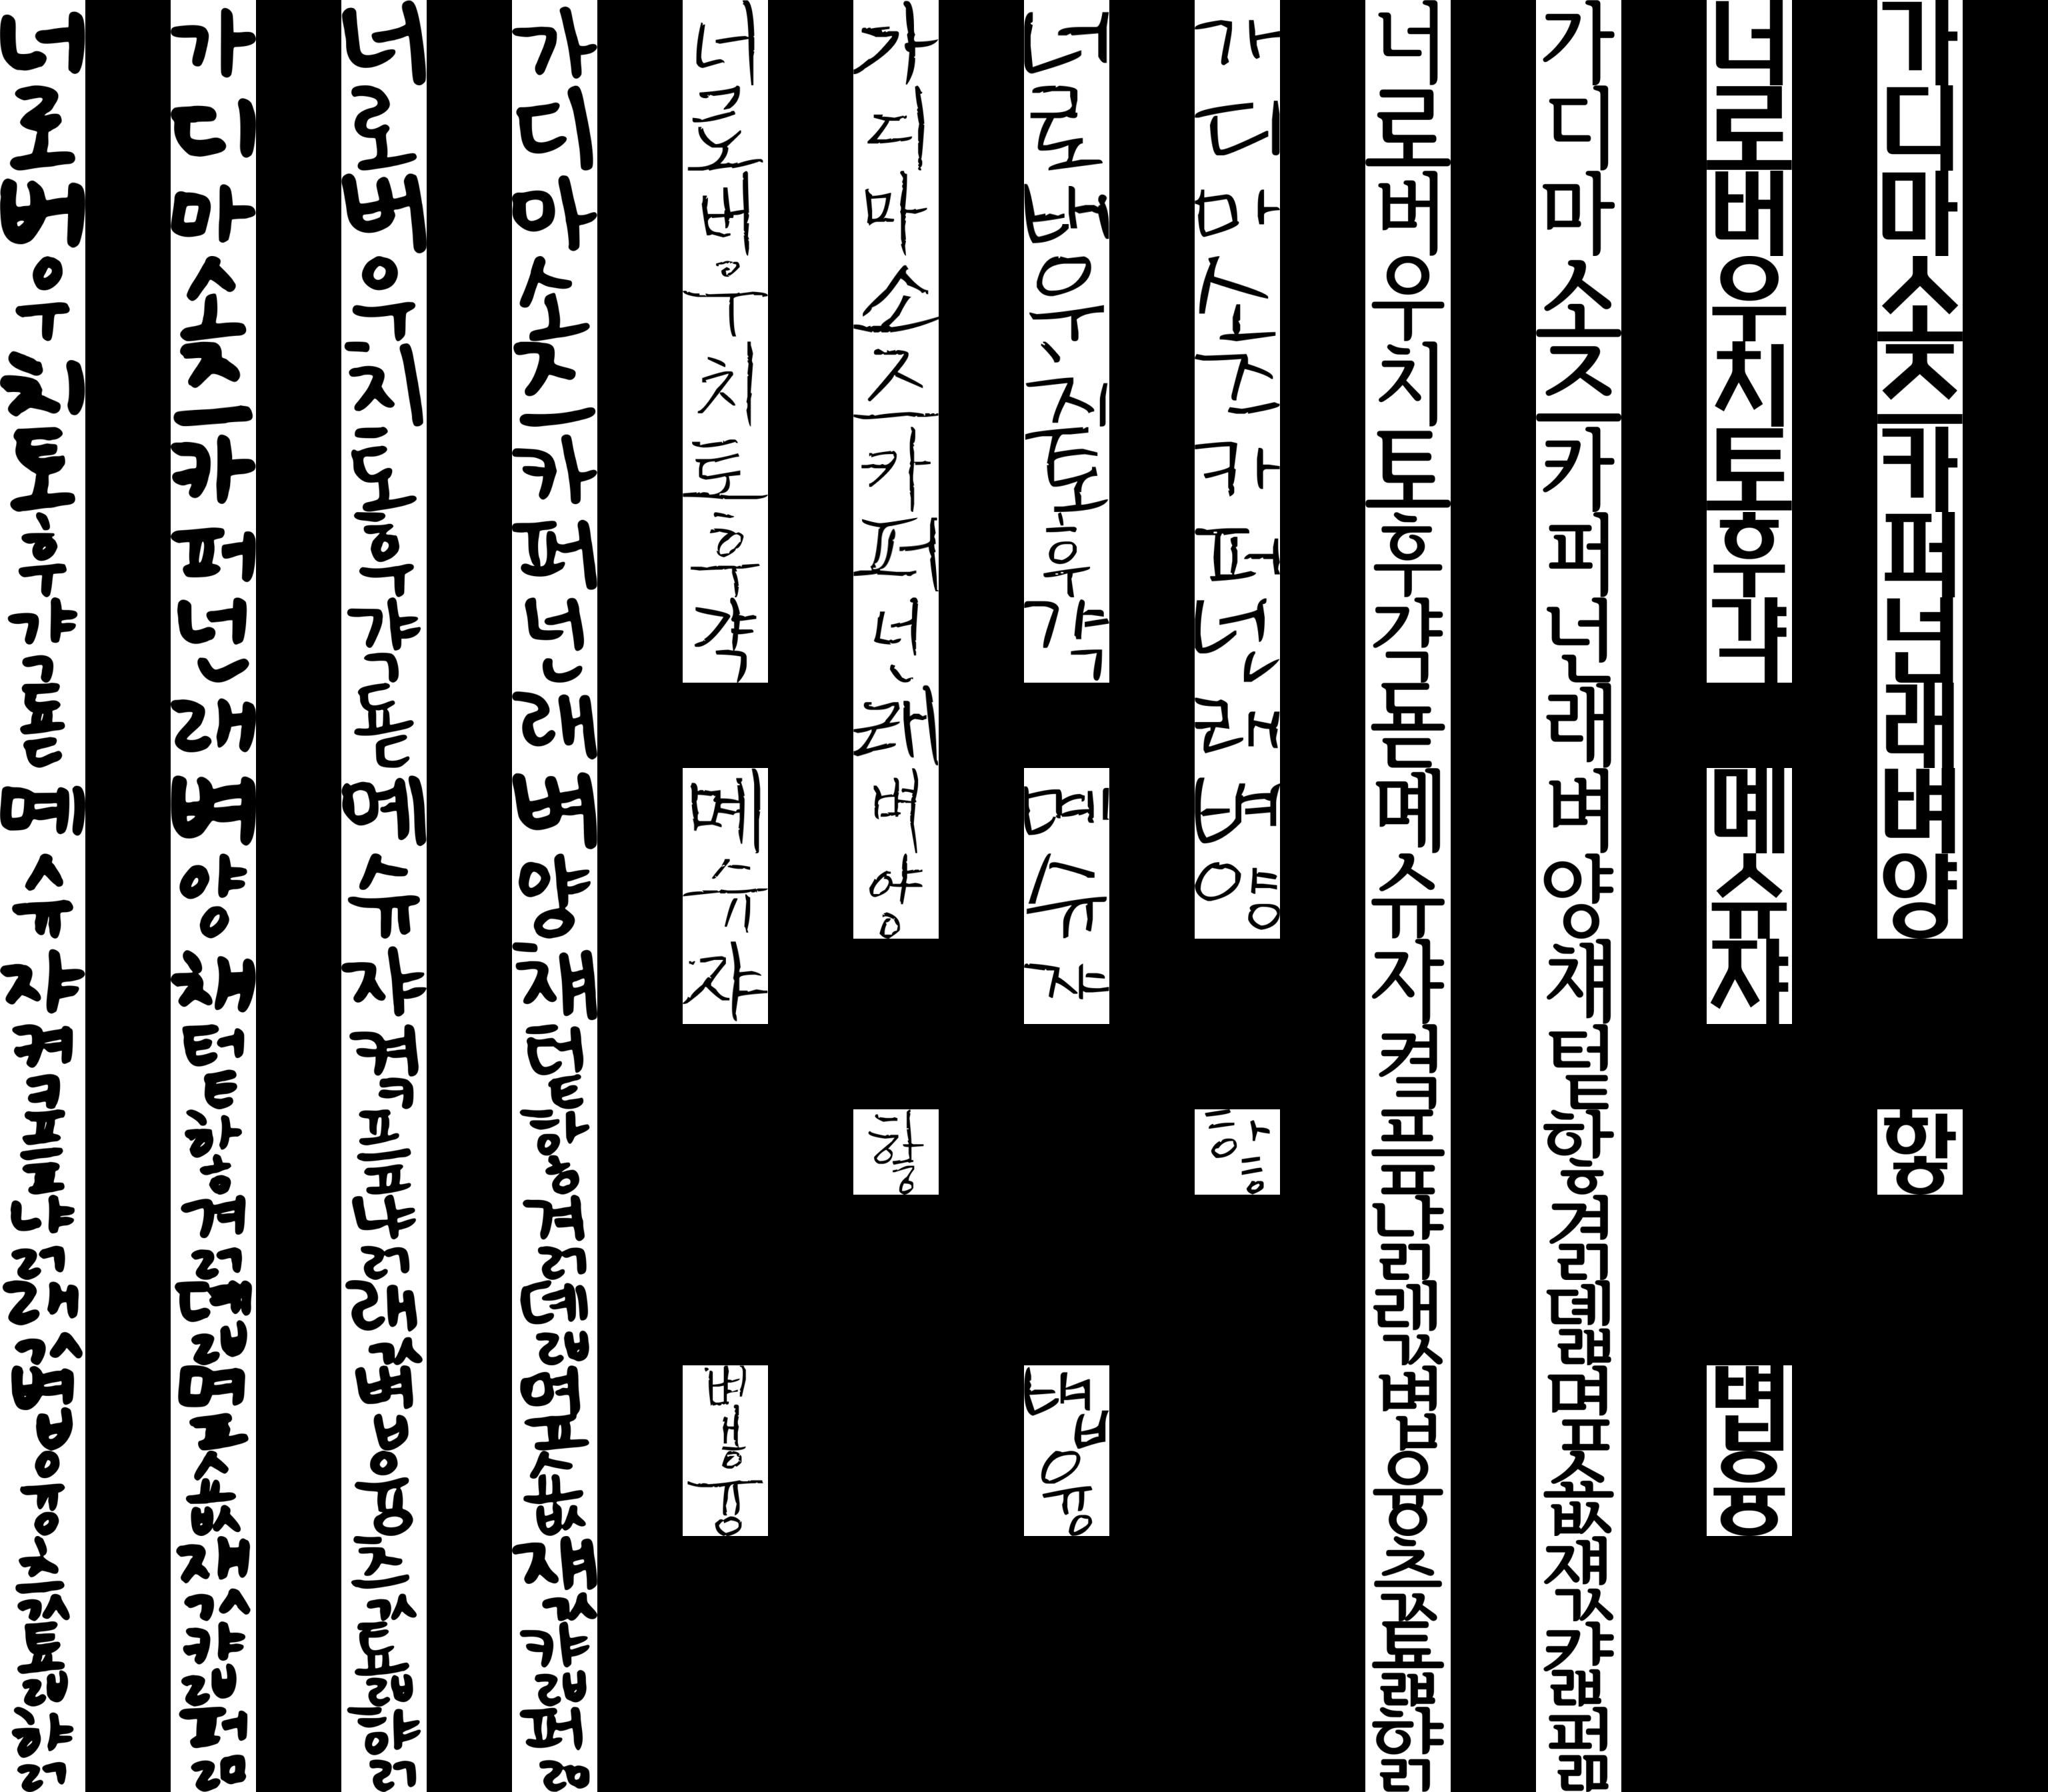

In [40]:
bigimg = ImageConcat(n_h=4*len(args.test_fonts), n_v=len(args.seens), resolution=128)
for si, usi in zip(args.seens_ids, args.unseens_ids):
    for font in args.test_fonts:
        # Seen True
        bigimg.append_img(f"{args.data_fd}/seen/{font}__{si}.png")
        bigimg.move_cursor_h()
        # Seen Generated
        bigimg.move_cursor_h()
        # Unseen True
        bigimg.append_img(f"{args.data_fd}/unseen/{font}__{usi}.png")
        bigimg.move_cursor_h()
        # Unseen Generated
        bigimg.move_cursor_h()
        # go down
    bigimg.reset_cursor_h()
    bigimg.move_cursor_v()
bigimg.img

In [38]:
args.data_fd

'/home/jupyter/ai_font/data/zipfiles/raw/size96'

In [39]:
Image.open(f"{args.data_fd}/unseen/twice dahyun_4__1292.png").convert('RGB').size

(128, 128)

In [ ]:
for ci in content_is:
    content_image = Image.open("data/r40202/pngs/gulim__%s.png"%str(ci)).convert('RGB')
    style_image = Image.open("data/r40202/pngs/%s__%s.png"%(str(style), str(style_i))).convert('RGB')
    out_image = sampling(
        args=args, 
        pipe=pipe, 
        content_image=content_image,
        style_image=style_image,
    )

In [17]:
args.seens_ids

[1288,
 3164,
 4228,
 6832,
 8792,
 9632,
 10948,
 57,
 2107,
 3724,
 5768,
 7112,
 9012,
 10526,
 1241,
 2971,
 4301,
 6965,
 8739,
 9755,
 10649]

In [15]:
[f for f in os.listdir('/home/jupyter/ai_font/data/zipfiles/raw/size96/unseen/') if "twice dahyun_4__" in f]

['twice dahyun_4__1292.png',
 'twice dahyun_4__8820.png',
 'twice dahyun_4__1971.png',
 'twice dahyun_4__6545.png',
 'twice dahyun_4__5646.png',
 'twice dahyun_4__177.png',
 'twice dahyun_4__8316.png',
 'twice dahyun_4__2968.png',
 'twice dahyun_4__4284.png',
 'twice dahyun_4__0.png',
 'twice dahyun_4__8887.png',
 'twice dahyun_4__9545.png',
 'twice dahyun_4__10118.png',
 'twice dahyun_4__7560.png',
 'twice dahyun_4__10611.png',
 'twice dahyun_4__3528.png',
 'twice dahyun_4__3722.png',
 'twice dahyun_4__2324.png',
 'twice dahyun_4__5516.png',
 'twice dahyun_4__10108.png',
 'twice dahyun_4__7143.png']